# Merging and exploration of individual stock beta values from Wharton databases.
1) Import large csv files then merge on premno (A type of stock ID).
2) Pivot table based on date.
3) Convert date column to 'datetime'
4) Create histogram with quarter (3 month) sized bins. How many companies have beta values here?
5) How many companies are there in each bin with beta and/or price > 0? Can I remove companies with negative betas?
6) What is the largest market cap for each date?
7) Based on this I may be able to safely calculate historical weighted average beta (weighted by market cap)


In [2]:
# TODO: I need to fix the datetime conversion, then I can experiment with plotting.

# Import python classes
import numpy as np
import pandas as pd


In [3]:
mcap_raw = pd.read_csv(r"C:\Users\Edmund\OMSA\MGT6203\group project\datasets\market cap\market_cap.csv")
display(mcap_raw.head())
betas_raw = pd.read_csv(r"C:\Users\Edmund\OMSA\MGT6203\group project\datasets\market_betas_all_data\raw_market_betas.csv")
display(betas_raw.head())
# permno_ticker_translations = pd.read_csv(r"C:\Users\Edmund\OMSA\MGT6203\group project\datasets\Permno_ticker_translations\permno_ticker_translations.csv")
# display(permno_ticker_translations.head())

# what are the shapes of these dataframes?
print(mcap_raw.shape)
print(betas_raw.shape)

,PERMNO,date,TICKER,COMNAM,PRC,SHROUT
0,10000,12/31/1985,NaN,NaN,NaN,NaN
1,10000,01/31/1986,OMFGA,OPTIMUM MANUFACTURING INC,-4.3750,3680.0
2,10000,02/28/1986,OMFGA,OPTIMUM MANUFACTURING INC,-3.2500,3680.0
3,10000,03/31/1986,OMFGA,OPTIMUM MANUFACTURING INC,-4.4375,3680.0
4,10000,04/30/1986,OMFGA,OPTIMUM MANUFACTURING INC,-4.0000,3793.0


,permno,yyyymmdd,bswa32,sd0111
0,10000,1986-01-31,1.04,NaN
1,10000,1986-02-28,0.53,NaN
2,10000,1986-03-31,0.55,NaN
3,10000,1986-04-30,0.33,NaN
4,10000,1986-05-30,0.26,NaN


(4169888, 6)
(3676436, 4)


In [4]:
# The mcap_raw has more rows so let's use it as the baseline.
# I need to put dates in the same format before merging on date and permno
print(type(mcap_raw['date'].loc[0]))
print(type(betas_raw['yyyymmdd'].loc[0]))

def beta_date_convert(betas_raw): # assumes input is yyyy-mm-dd , convert to mm/dd/yyyy.
    dates_converted = []
    for date in betas_raw['yyyymmdd']:
        yyyy, mm, dd = date.split('-') # split on dash.
        dates_converted.append(mm+'/'+dd+'/'+yyyy)
    return dates_converted

betas_raw['date'] = beta_date_convert(betas_raw)
display(betas_raw.head())
# mcaps_and_betas_raw = mcap_raw.merge(betas_raw, left_on='PERMNO', right_on = "permno", how='left') # mer
# display(mcaps_and_betas_raw.head())

<class 'str'>
<class 'str'>


,permno,yyyymmdd,bswa32,sd0111,date
0,10000,1986-01-31,1.04,NaN,01/31/1986
1,10000,1986-02-28,0.53,NaN,02/28/1986
2,10000,1986-03-31,0.55,NaN,03/31/1986
3,10000,1986-04-30,0.33,NaN,04/30/1986
4,10000,1986-05-30,0.26,NaN,05/30/1986


In [5]:
mcap_betas_raw = pd.merge(mcap_raw, betas_raw, how='left', left_on=['PERMNO','date'], right_on = ['permno','date']) #leftmerge where perno and date are equal
display(mcap_betas_raw.head())

,PERMNO,date,TICKER,COMNAM,PRC,SHROUT,permno,yyyymmdd,bswa32,sd0111
0,10000,12/31/1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10000,01/31/1986,OMFGA,OPTIMUM MANUFACTURING INC,-4.3750,3680.0,10000.0,1986-01-31,1.04,NaN
2,10000,02/28/1986,OMFGA,OPTIMUM MANUFACTURING INC,-3.2500,3680.0,10000.0,1986-02-28,0.53,NaN
3,10000,03/31/1986,OMFGA,OPTIMUM MANUFACTURING INC,-4.4375,3680.0,10000.0,1986-03-31,0.55,NaN
4,10000,04/30/1986,OMFGA,OPTIMUM MANUFACTURING INC,-4.0000,3793.0,10000.0,1986-04-30,0.33,NaN


In [15]:
mcap_betas = mcap_betas_raw[['PERMNO', 'date', 'TICKER', 'COMNAM', 'PRC', 'SHROUT','bswa32']] # only keep columns of interest
# convert string date to datetime for plotting
# mcap_betas['date'] = 
mcap_betas['date'] = pd.to_datetime(mcap_betas['date'], format='%m/%d/%Y' , errors='ignore')
print(type(mcap_betas['date'].loc[0]))
display(mcap_betas.head())

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


C:\Users\Edmund\AppData\Local\Temp\ipykernel_8908\3289048688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcap_betas['date'] = pd.to_datetime(mcap_betas['date'], format='%m/%d/%Y' , errors='ignore')


,PERMNO,date,TICKER,COMNAM,PRC,SHROUT,bswa32
0,10000,1985-12-31,NaN,NaN,NaN,NaN,NaN
1,10000,1986-01-31,OMFGA,OPTIMUM MANUFACTURING INC,-4.3750,3680.0,1.04
2,10000,1986-02-28,OMFGA,OPTIMUM MANUFACTURING INC,-3.2500,3680.0,0.53
3,10000,1986-03-31,OMFGA,OPTIMUM MANUFACTURING INC,-4.4375,3680.0,0.55
4,10000,1986-04-30,OMFGA,OPTIMUM MANUFACTURING INC,-4.0000,3793.0,0.33


<AxesSubplot:xlabel='PRC'>

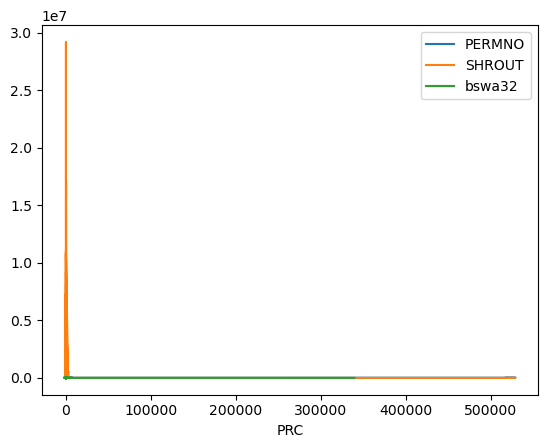

In [11]:
# make histograms to get a sense of the price, shares outstanding, and betas:
mcap_betas.hist('PRC')
mcap_betas.hist('SHROUT')